In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Penasco y Castellana, Mrs. Victor de Satode (M...",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,16))
sns.set()

/Users/ajain11/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1152x1152 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16dddf98>,
      dtype=object)

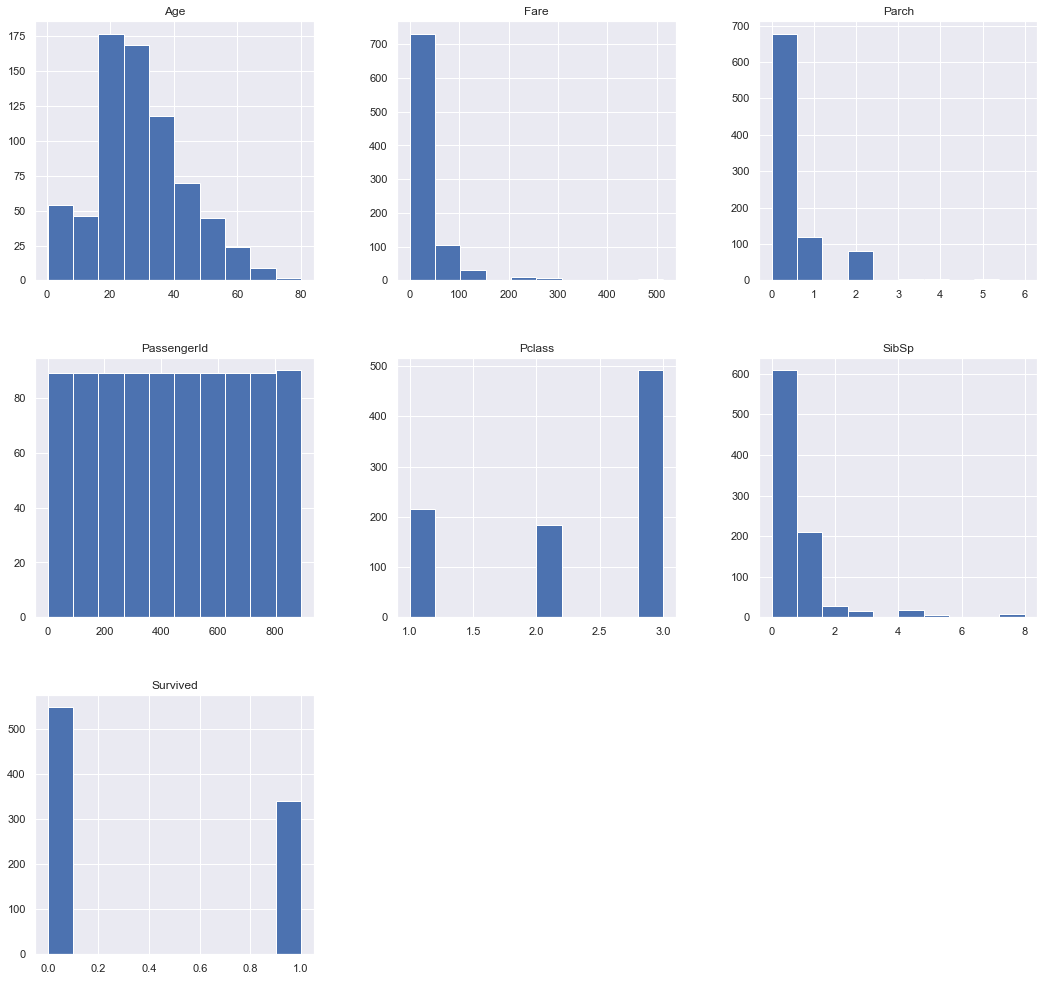

In [8]:
titanic.hist(figsize=(16,16))

In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
len(titanic.PassengerId.unique())

891

#### Since all values of passenger id are unique, it is not useful for prediction.

In [20]:
titanic.drop('PassengerId', axis = 1, inplace = True)

In [21]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Analyzing ticket column

In [22]:
len(titanic.Ticket.unique())

681

In [56]:
ticket_counts_df = titanic.Ticket.value_counts().to_frame()
ticket_counts_df.head()

,Ticket
CA. 2343,7
1601,7
347082,7
3101295,6
347088,6


In [61]:
duplicate_tickets = ticket_counts_df[ticket_counts_df['Ticket'] > 1].index.to_list()

In [66]:
friends_family_df = titanic[titanic['Ticket'].isin(duplicate_tickets)].sort_values(by='Ticket')
friends_family_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S
504,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S


#### Figure out whether people with the same ticket have the same tendency to survive.

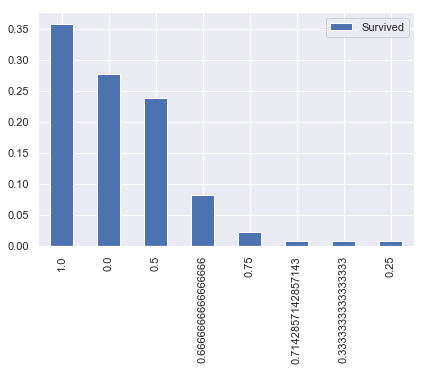

In [97]:
survival_same_ticket = (friends_family_df.groupby('Ticket')\
                        .Survived.sum()/friends_family_df.groupby('Ticket').Survived.count()).to_frame()
survival_same_ticket_dist = survival_same_ticket.Survived.value_counts().to_frame()
survival_same_ticket_dist['Survived'] = survival_same_ticket_dist['Survived']/survival_same_ticket_dist.Survived.sum()
survival_same_ticket_dist.plot(kind='bar')

#### In 35% of the duplicate ticket cases, all people in the same group survived. In 27% of the duplicate ticket cases, all people in the same group died. In the remaining 38% of the duplicate ticket cases, people in the same group had irregular survival rate.

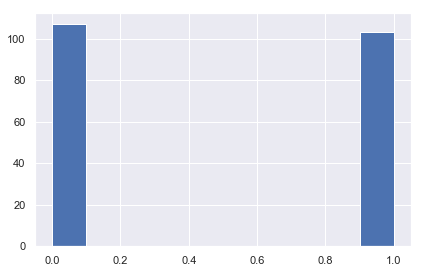

In [100]:
titanic[titanic.duplicated(subset='Ticket')].Survived.hist()

#### There is almost an even distribution between survived and non-survived people when they shared a ticket with somebody else on the ship. Hence, the ticket does not explain the survival rate. Dropping the column for now.

In [102]:
titanic.drop('Ticket', axis=1, inplace=True)

In [103]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


#### Analyzing Sex column

In [108]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

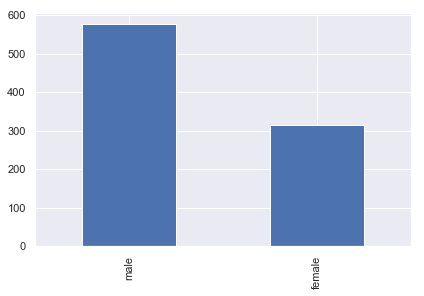

In [119]:
titanic.Sex.value_counts().plot(kind='bar')

In [137]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

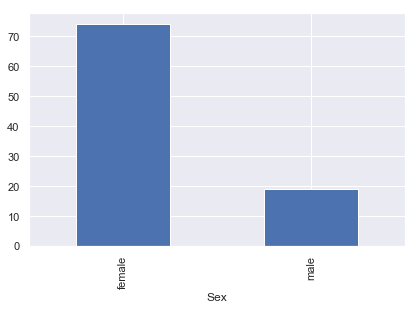

In [136]:
titanic.groupby('Sex').apply(lambda x: round(((x['Survived'].sum()/x['Survived'].count())*100), 2)).plot(kind='bar')

#### >70% of the females survived compared to only about 20% of males although the number of males were much more in comparison to females. So, looks like Age is an important factor for predicting Survival.

In [101]:
titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [ ]:
titanic.columns

In [ ]:
titanic.Embarked.value_counts()

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
feature_columns = ['Fare', 'Pclass', 'Age']

In [ ]:
X = titanic[feature_columns]

In [ ]:
X.isnull().sum()

In [ ]:
X_transformed = imp_mean.fit_transform(X)
X = pd.DataFrame(data=X_transformed, columns = feature_columns)
X.head()

In [ ]:
X.isnull().sum()

In [ ]:
y = titanic['Survived']

In [ ]:
plt.scatter(X['Fare'], X['Age'], c=y)

In [ ]:
plt.scatter(X['Fare'], X['Pclass'], c=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

In [ ]:
X = pd.DataFrame(data=X_scaled, columns=['Fare', 'Pclass', 'Age'])

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y, alpha=0.2)

In [ ]:
plt.scatter(X_scaled[:, 0], y)

In [ ]:
plt.scatter(X_scaled[:, 2], y)

In [ ]:
categorical = titanic[['Embarked']]
categorical

In [ ]:
titanic[titanic.isnull().any(axis=1)]

In [ ]:
titanic[titanic.Embarked.isnull()]

In [ ]:
categorical.fillna('N', inplace=True)
categorical.isnull().sum()

In [ ]:
categorical.Embarked.value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
categorical_encoded = enc.fit_transform(categorical).toarray()

In [ ]:
categorical_encoded

In [ ]:
enc.get_feature_names()

In [ ]:
encoded_feature_names = ['embarked_C', 'embarked_N', 'embarked_Q', 'embarked_S']

In [ ]:
categorical_df = pd.DataFrame(data=categorical_encoded, columns = encoded_feature_names)

In [ ]:
categorical_df.head()

In [ ]:
X = X.join(categorical_df)

In [ ]:
X

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=20)
print(scores)
print(scores.mean())

In [ ]:
base_accuracy = 105/(105+74)
print(base_accuracy)

In [ ]:
lr.fit(X, y)

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=100)
scores = cross_val_score(svm, X, y, cv=20)
print(scores)
print(scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=20)
print(scores)
print(scores.mean())

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

In [ ]:
lr.fit(train_X, train_y)

In [ ]:
lr.score(test_X, test_y)

In [ ]:
lr.score(train_X, train_y)

In [ ]:
svm.fit(train_X, train_y)

In [ ]:
svm.score(train_X, train_y)

In [ ]:
svm.score(test_X, test_y)

In [ ]:
rfc.fit(train_X, train_y)

In [ ]:
rfc.score(train_X, train_y)

In [ ]:
rfc.score(test_X, test_y)

In [ ]:
rfc2 = RandomForestClassifier(n_estimators=200)
rfc2.fit(train_X, train_y)
print(rfc2.score(train_X, train_y))
print(rfc2.score(test_X, test_y))

In [ ]:
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
titanic_test.head()

In [ ]:
titanic_test[titanic_test.Fare.isnull()]

In [ ]:
#titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'] = 0

In [ ]:
test_embarked = enc.transform(titanic_test[['Embarked']]).toarray()

In [ ]:
test_embarked = pd.DataFrame(data = test_embarked, columns = encoded_feature_names)

In [ ]:
X_eval = titanic_test[feature_columns]
X_eval.head()

In [ ]:
X_eval.isnull().sum()

In [ ]:
X_eval_transformed = imp_mean.transform(X_eval)

In [ ]:
X_eval = pd.DataFrame(data=X_eval_transformed, columns = feature_columns)
X_eval.head()

In [ ]:
X_eval.isnull().sum()

In [ ]:
X_eval = min_max_scaler.transform(X_eval)

In [ ]:
X_eval = pd.DataFrame(data = X_eval, columns = feature_columns)

In [ ]:
X_eval.isnull().sum()

In [ ]:
test_preds = svm.predict(X_eval.join(test_embarked))

In [ ]:
y.value_counts()

In [ ]:
test_preds.size

In [ ]:
titanic_test.shape

In [ ]:
titanic_test.columns

In [ ]:
titanic_test['Survived'] = test_preds

In [ ]:
titanic_test.head()

In [ ]:
output = titanic_test[['PassengerId', 'Survived']]

In [ ]:
output.head()

In [ ]:
output.to_csv('submission.csv', index = False)

In [ ]:
output

In [ ]:
output.Survived.value_counts()